<a href="https://colab.research.google.com/github/piusAI/DeepLearning_Basic/blob/main/Chap04_05_AvatarDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.5 Activate DL Algorithm
##Lecture 9, Numerical Gradient Activation!

#### TwoLayerNet

In [ ]:
#PrePare functions
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
  return (1.0 - sigmoid(x)) * sigmoid(x)

def softmax(x):
  if x.ndim ==2:
    x = x - np.max(x, axis=1, keepdims=1)
    y = np.exp(x) / np.sum(np.exp(x),axis=1, keepdims=1)

  else :
    x = x - np.max(x)
    y = np.exp(x) / np.sum(np.exp(x))

  return y

def CEE(y,t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  if t.size == y.size:
    t = t.argmax(axis=1)
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size),t])) / batch_size
  # return -np.um(np.log(np.clip(y[np.arange(batch_size),t],1e-7, 1))) / batch_size ##clip like Clamp 1e-7 1

def _numerical_gradient_no_batch(f,x):
  h = 1e-4
  grad= np.zeros_like(x)
  for i in range(x.size):
    tmp_val = x[i]
    x[i] = tmp_val +h
    fxh1 = f(x)

    x[i] = tmp_val -h
    fxh2 = f(x)

    grad[i] = ( fxh1 - fxh2 ) / ( 2 * h )
    x[i] = tmp_val
    return grad

def numerical_gradient(f,X):
  if X.ndim==1:
    return _numerical_gradient_no_batch(f,X)
  else :
    grad = np.zeros_like(X)
    for i, idx in enumerate(X):
      grad[i] = _numerical_gradient_no_batch(f,idx)
    return grad

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params={}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x,W1) + b1    #Affine
    z1 = sigmoid(a1)          #Sigmoid
    a2 = np.dot(z1, W2) + b2  #Affine
    y = softmax(a2)           #Softmax
    return y
  def accuracy(self, x,t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    # t = np.argmax(t, axis=1) ==> hot-hot이 아닌 경우에는 그대로 둬야함!

    if t.ndim !=1:
      t=np.argmax(t, axis=1)

    accuracy = np.sum(y==t) / float(x.shape[0]) #select Correct y==t, Divide X's Rows
    return accuracy

  def loss(self, x, t):
    y = self.predict(x)
    loss = CEE(y,t)
    return loss

  def numerical_gradient(self, x, t):
    loss_w= lambda W : self.loss(x,t) # loss_w is like Function, Lambda W is Wrapper!

    grad = {}
    grad['W1'] = numerical_gradient(loss_w, self.params['W1'])
    grad['b1'] = numerical_gradient(loss_w, self.params['b1'])
    grad['W2'] = numerical_gradient(loss_w, self.params['W2'])
    grad['b2'] = numerical_gradient(loss_w, self.params['b2'])
    return grad

  ##역전파인데 그냥 넣어줌!!
  def gradient(self, x, t):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    grads = {}

    batch_num = x.shape[0]

    a1= np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    if t.ndim ==1:
      t_one_hot = np.zeros_like(y)
      t_one_hot[np.arange(batch_size), t]=1
      t=t_one_hot

    dy = (y-t) / batch_num
    grads['W2'] = np.dot(z1.T, dy)
    grads['b2'] = np.sum(dy,axis=0)

    da1 = np.dot(dy, W2.T)
    dz1 = sigmoid_grad(a1) * da1
    grads['W1'] = np.dot(x.T, dz1)
    grads['b1'] = np.sum(dz1, axis=0)

    return grads

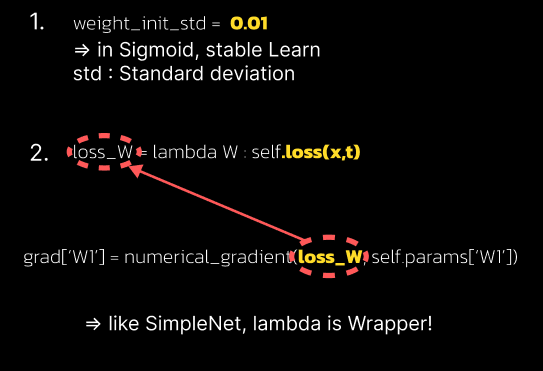

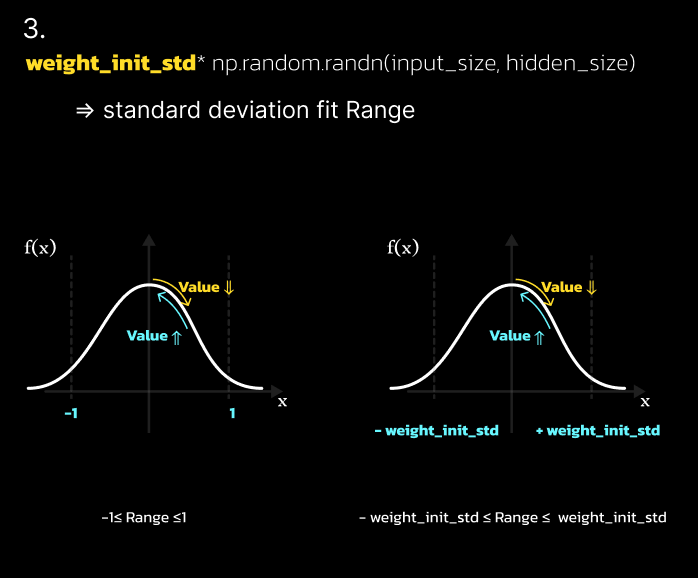

**weight_init_std**

std : standard deviation, Fit range Standard Distribution




In [ ]:
net0 = TwoLayerNet(3,4,3)
net1 = TwoLayerNet(784, 50, 10)


print(net0.params)
#self.params['W1'] <= self : [InstanceName]

print("\n","W1 shape : ", net1.params['W1'].shape)
print("\n","b1 shape : ", net1.params['b1'].shape)
print("\n","W2 shape : ", net1.params['W2'].shape)
print("\n","b2 shape : ", net1.params['b2'].shape)

{'W1': array([[-0.00383827, -0.00251307,  0.01942637, -0.00257624],
       [-0.00986407, -0.00664694, -0.00519703, -0.00156215],
       [ 0.00474252, -0.0028501 , -0.01450181,  0.00893339]]), 'b1': array([0., 0., 0., 0.]), 'W2': array([[-0.00797201, -0.00235231,  0.00415952],
       [-0.0159175 , -0.0021923 ,  0.00968731],
       [ 0.01599798,  0.00254925, -0.01117501],
       [-0.00799635,  0.01177649, -0.01584038]]), 'b2': array([0., 0., 0.])}

 W1 shape :  (784, 50)

 b1 shape :  (50,)

 W2 shape :  (50, 10)

 b2 shape :  (10,)


*Mnist* Data  =>  Dictionary 형식(Form)

*Neural NetWork* Data : Weight + Bias Data



```
self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
```

dic["Key"] = value

net0 shape :
- W1.shape : 3x4
- b1.shape : 4
- W2.shape : 4x3
- b2.shape : 3
(Input size = 3, hidden size = 4, Output size : 3)

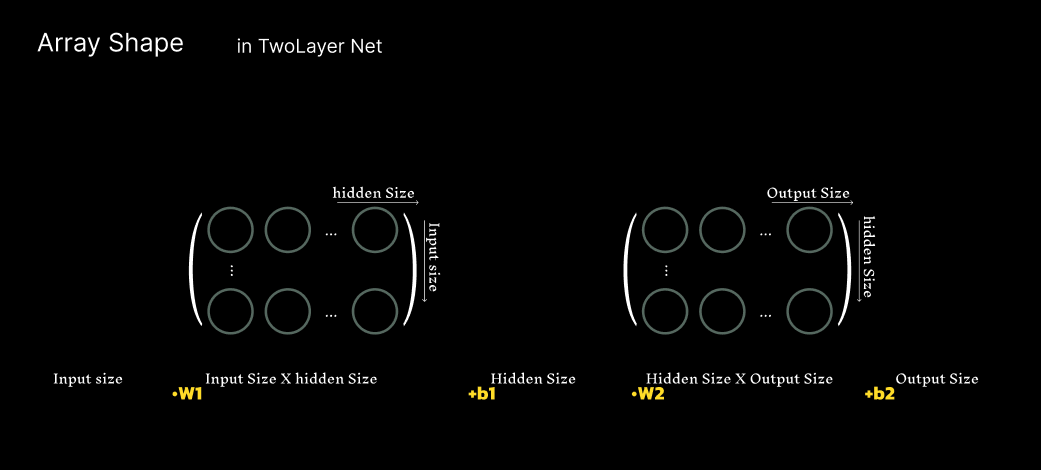

Init Value

이런식으로 실제 학습시, Weight는 랜덤하게, Bias는 0으로 초기화.


| 항목     | 초기화 방식                | 이유                             |
| ------ | --------------------- | ------------------------------ |
| Weight | **random, 초기화** (정규/균등 분포) | 뉴런마다 다른 출발점 필요                 |
| Bias   | **0, 초기화**           | 학습 중 자동으로 최적화되며, 초기에는 차이 없어도 됨 |


In [ ]:
# net0.predict(np.array([1,2,3]))
net1.predict(np.random.randn(784))

array([0.10077185, 0.0969264 , 0.09790673, 0.100988  , 0.09739183,
       0.09975797, 0.09919777, 0.10220177, 0.10867955, 0.09617813])

Affine => Sigmoid => Affine => Soft Max를 거쳐서

OutputSize, **10개로 나옴**!

- Accuracy : Step Function, 무의미한 Differential
- Loss : Soft Function, 유의미한 Differential

=> 학습 끝난 이후에는 Accuracy가 더 정확하게 정확도 얻을 수 있다

####Nuerial Network Mnist data Learn

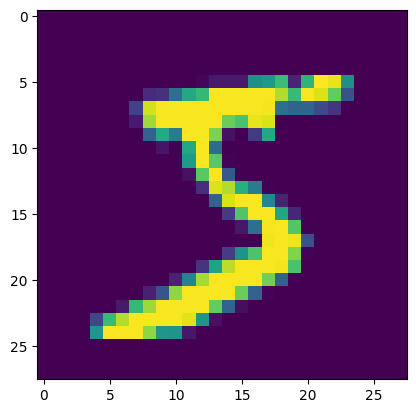

In [ ]:
#import keras Mnist
import numpy as np
from keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train= x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28,28))

[Test]

Iters_num:10000 => 50, Batch_ Size 100=>10

In [ ]:
import numpy as np
from keras.datasets import mnist
(x_train, t_train), (x_test, t_test) =mnist.load_data()

##  Mnist data Flatten & Normalize here!  ##
x_train = x_train.reshape(x_train.shape[0],-1) / 255.0
x_test = x_test.reshape(x_test.shape[0],-1) / 255.0
##################################

train_loss_list=[]

iters_num = 50 #TEST
train_size = x_train.shape[0]
batch_size = 10 #Test
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size= 50, output_size = 10)
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size) #Slicing
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask] #Matching batch_mask

  # grad = network.numerical_gradient(x_batch, t_batch)
  grad = network.gradient(x_batch, t_batch) #Backprogation

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key] #descent Gradient

  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

- 01 network.numerical_gradient

=> ['W1'], ['b1'], ['W2'], ['b2'] 이런식으로 Dictionary 형태로 Return!:



In [ ]:
print(train_loss_list)
print(np.sum(train_loss_list) / len(train_loss_list)) # CEE 확인해봄
print(np.mean(train_loss_list)) #같은방식

[np.float64(2.114052862892593), np.float64(2.162622507173781), np.float64(2.128424842126653), np.float64(2.2227953210797424), np.float64(2.23263090277918), np.float64(2.252756349242998), np.float64(2.2472614013903733), np.float64(2.170812680678525), np.float64(2.310091093310498), np.float64(2.234088731027248), np.float64(2.1124890000763648), np.float64(2.1301345545533934), np.float64(2.2529925464584495), np.float64(2.1754236214002467), np.float64(2.2170387576502466), np.float64(2.2152247961279263), np.float64(2.248370246303439), np.float64(2.1767683629548378), np.float64(2.2712128366999433), np.float64(2.162742673480248), np.float64(2.231746174403365), np.float64(2.245687853425047), np.float64(2.103896452545624), np.float64(2.2041248985334128), np.float64(2.2252064918742875), np.float64(2.281046532649892), np.float64(2.243480750325393), np.float64(2.22431150642531), np.float64(2.1774550400702952), np.float64(2.1601420091631582), np.float64(2.244742378220534), np.float64(2.1492013638250

Stochastic VS Gradient

| **Descent 종류**                        | **표본 크기 (한 iteration 당)** | **정확도**     | **속도**          |
| ------------------------------------- | ------------------------- | ----------- | --------------- |
| **Batch Gradient Descent**            | 전체 데이터셋 (전체 60,000장)      | 가장 정확 (평균적) | 느림 (한 번 계산량 많음) |
| **Stochastic Gradient Descent (SGD)** | 1장 (진짜 stochastic)        | 요동침, 불안정    | 매우 빠름           |
| **Mini-batch Gradient Descent**       | 일부 샘플 (예: 100장)           | 거의 비슷, 안정적  | 빠름 + 효율적        |


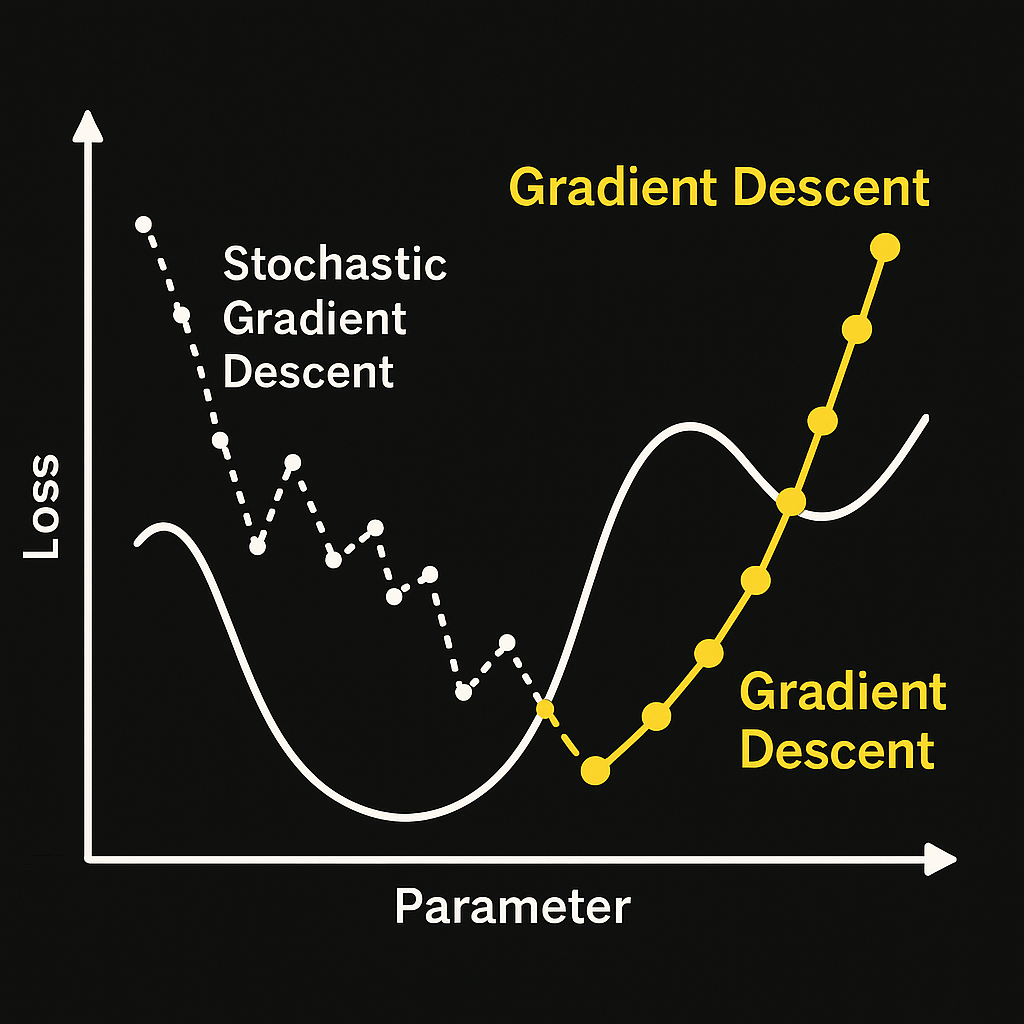

[요상한 궁금증 🤔]
 - Q, 총 Data 수가 6만개면 6만개만 학습하면 되는거 아니야? Iteration을 하면서까지 왜 MiniBatch Gradient Descent를 활용하는거?

🧠A. DL의 핵심은 '한번 학습'이 아니라, 'Loss를 반복적으로 줄여나가는 과정'.

> 60,00개를 한번 만 비교(학습)한다면 한(iteration=1)번 학습한 것 이다.
>
> 같은 Data를 여러번보면서 Parameter를 점점 더 최적화 해야함.



---


🌀 Iteration 개념

-  Iteration 1개당 1번 학습 : **Stochasic GD**
-  Iteration 1개당 n번 학습 : **Mini-batch GD**

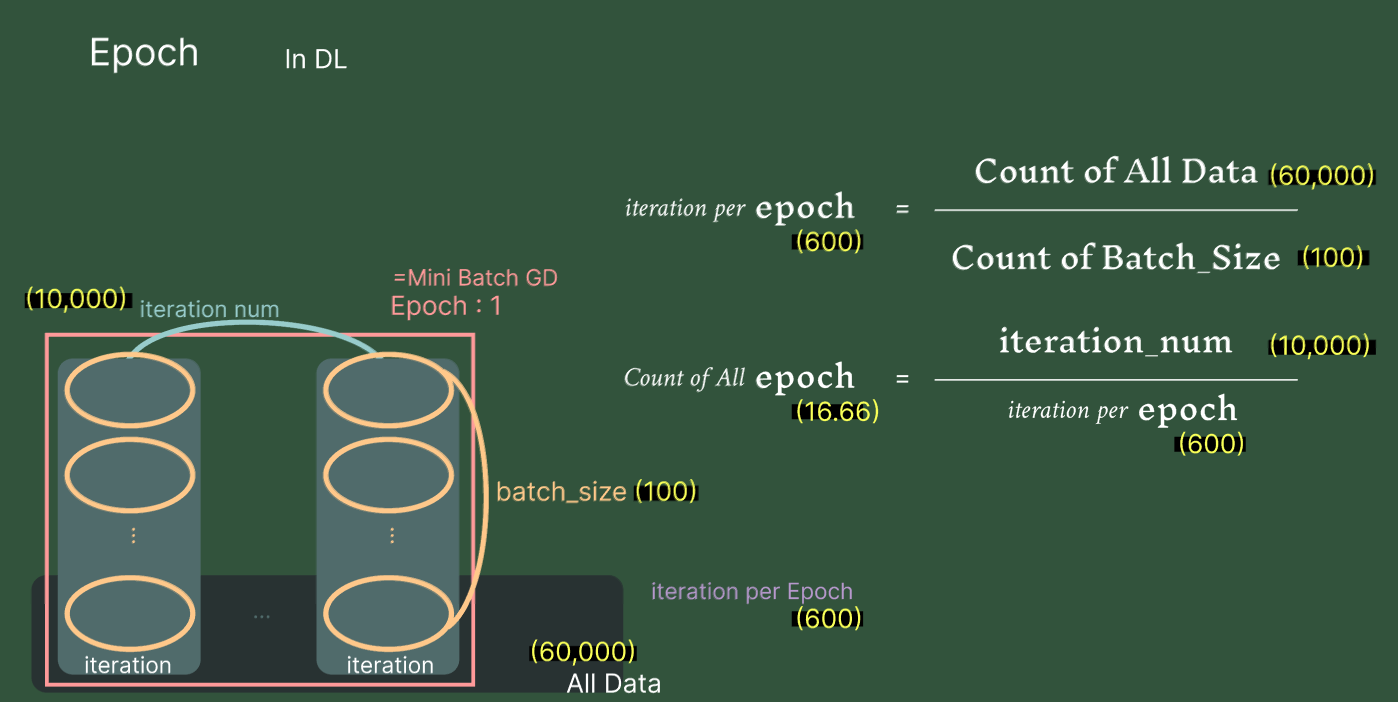

✅ 1. iteration_per_Epoch : 전체 Data를 다 소진할때까지의 학습량

✅ 2. Batch_size : iteration 한번돌아갈때의 학습량

####sigmoid_gradient

In [ ]:
def sigmoid_gradient(x):
  return sigmoid(x) * (1 - sigmoid(x))

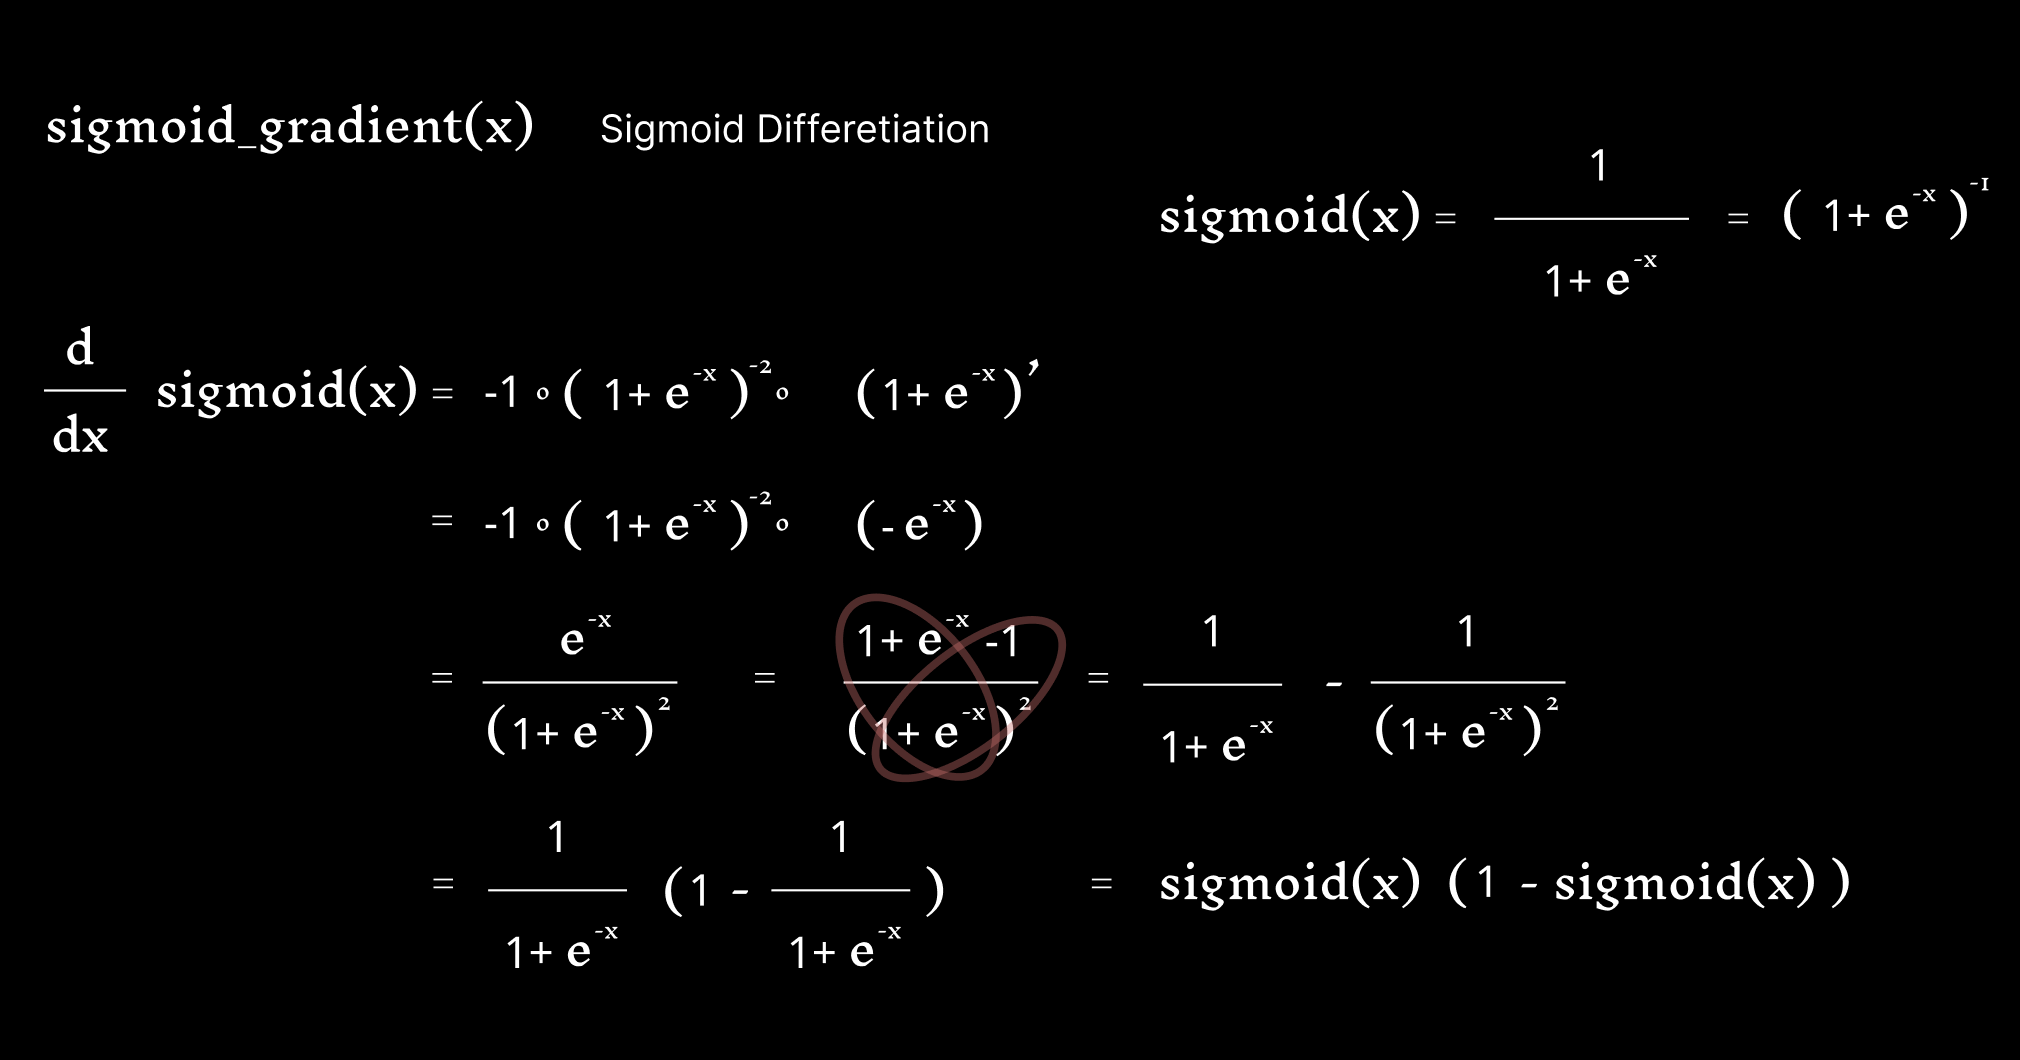

#### Stochastic GD

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.9246, 0.9267
train acc, test acc | 0.9484, 0.9464
train acc, test acc | 0.9583833333333334, 0.9555
train acc, test acc | 0.96455, 0.9573
train acc, test acc | 0.9700666666666666, 0.9625
train acc, test acc | 0.9735, 0.9642
train acc, test acc | 0.9752, 0.9654
train acc, test acc | 0.9761666666666666, 0.9651
train acc, test acc | 0.9798166666666667, 0.9682
train acc, test acc | 0.9800666666666666, 0.9674
train acc, test acc | 0.98255, 0.9704
train acc, test acc | 0.9837833333333333, 0.9685
train acc, test acc | 0.9850166666666667, 0.9713
train acc, test acc | 0.98605, 0.9717
train acc, test acc | 0.9871166666666666, 0.9708
train acc, test acc | 0.9872166666666666, 0.9704


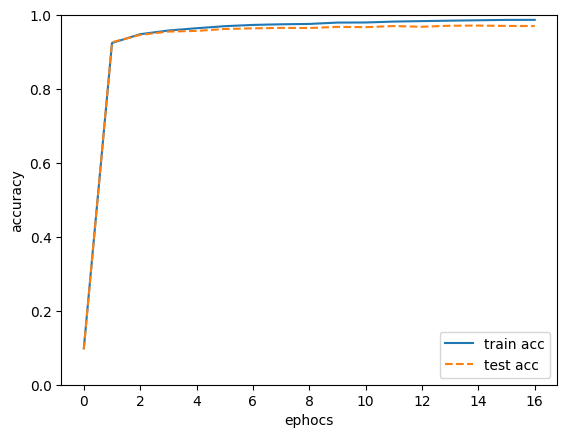

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(x_train, t_train), (x_test, t_test) =mnist.load_data()

##  Mnist data Flatten & Normalize here!  ##
x_train = x_train.reshape(x_train.shape[0],-1) / 255.0
x_test = x_test.reshape(x_test.shape[0],-1) / 255.0
##################################

network=TwoLayerNet(input_size = 784, hidden_size=50, output_size = 10)

iters_num = 10000 #10000=>100
train_size = x_train.shape[0]
batch_size = 100 #100=>10
learning_rate = 1 #0.1=>1

train_loss_list = []
train_acc_list = []
test_acc_list = [] #최종 NN 정확도

# 1Epoch당 학습 횟수
iter_per_epoch = max(train_size / batch_size,  1)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  grad = network.gradient(x_batch, t_batch)

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  if i % iter_per_epoch == 0: #600배수일
    train_acc = network.accuracy(x_train,t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc)+ ", " + str(test_acc))

markers = {'train' : "o", 'test' :'s'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label ='train acc')
plt.plot(x, test_acc_list, label = 'test acc', linestyle='--')
plt.xlabel('ephocs')
plt.ylabel('accuracy')

plt.ylim(0,1.0)
plt.legend(loc='lower right') #lower right에 표시
plt.show()

test acc가 더 유의미한 정보겠다.

++ gradient를 활용했음.
역전파를 활용해서 해야지 되겠다
numerical_gradient는 너무 오래걸림 34,760개에다가 몇개 더 해야해서 계산 못한다

#### All Data GD, Learning WithOut Slicing(No Stochastic)